In [103]:
import json
import warnings
import re
import pandas as pd
import numpy as np
from pandas import json_normalize
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
import matplotlib.pyplot  as plt
import seaborn as sns



In [93]:
base_path = "/Users/gyanapradhan/Desktop/Datasets/"
data_path = base_path + "Express_train.json"
trains = pd.read_json(base_path + "Express_train.json")

In [16]:
#####this code is to load_json file , so not useful as we already read the file onto a DataFRame'''
# base_path = "/Users/gyanapradhan/Desktop/Datasets/Express_train.json"
# # data_file = base_path + "Express_train.json"
# try:
#     with open ("base_path",'r') as file:
#         data_file=json.load(file)
# except FileNotFoundError:
#     print(f"{base_path} ")
#     print("base_path not found")


/Users/gyanapradhan/Desktop/Datasets/Express_train1.json 
base_path not found


In [94]:
trains.head(3)


,trainNumber,trainName,route,runningDays,trainRoute
0,961,VALLEY QUEEN SPL,MARWAR JN to KHAMIL GHAT,"{'SUN': True, 'MON': True, 'TUE': False, 'WED'...","[{'sno': '1', 'stationName': 'MARWAR JN - MJ',..."
1,962,VALLEY QUEEN SPL,KHAMIL GHAT to MARWAR JN,"{'SUN': True, 'MON': True, 'TUE': False, 'WED'...","[{'sno': '1', 'stationName': 'KHAMIL GHAT - KB..."
2,1007,LTT LUR SPL,LOKMANYATILAK T to LATUR,"{'SUN': True, 'MON': False, 'TUE': False, 'WED...","[{'sno': '1', 'stationName': 'LOKMANYATILAK T ..."


In [95]:
trains["trainRoute"] .head(3)

0    [{'sno': '1', 'stationName': 'MARWAR JN - MJ',...
1    [{'sno': '1', 'stationName': 'KHAMIL GHAT - KB...
2    [{'sno': '1', 'stationName': 'LOKMANYATILAK T ...
Name: trainRoute, dtype: object

In [96]:
### commented below code couldn't work as distance are "24 KMs" so non numeric has to applied with regex to get only ###numeric values

# def convert_distance(x):
#     try:
#         return float(x)
#     except Exception as e:
#         return np.nan
#
# def calc_total_distance(route):
#     distances = [convert_distance(station.get('distance', )) for station in route]
#     print(distances)
#     return np.nansum(distances)  # Sum while ignoring NaN values
#

## new custom function witten to fine the distnace between stations in "27 KM " formats
### then apply regex.findall to num values and convert int/float to sumup nasum for route length


def distance_data(route):
    distance=  [stop.get('distance','0')for stop in route]
    return distance

def route_distance(dist):
    num_data =[int(re.findall(r'\d+',item)[0]) for item in dist]
    return np.nansum(num_data) # Sum while ignoring NaN values




In [67]:
#testing the o/p of distance_date for a list
result=distance_data([{"sno": "1", "stationName": "MARWAR JN - MJ", "arrives": "Source", "departs": "09:45", "distance": "0 kms", "day": "1"}, {"sno": "2", "stationName": "PHULAD - FLD", "arrives": "11:00", "departs": "11:15", "distance": "25 kms", "day": "1"}, {"sno": "3", "stationName": "KHAMIL GHAT - KBK", "arrives": "12:45", "departs": "Destination", "distance": "47 kms", "day": "1"}])
print(result)

['0 kms', '25 kms', '47 kms']


In [97]:
trains['stations'] = trains['trainRoute'].apply(lambda route: len(route))
trains['stations']

0        3
1        3
2        9
3        9
4       21
        ..
2528    12
2529    39
2530     3
2531     3
2532    35
Name: stations, Length: 2533, dtype: int64

In [98]:
trains['station_distance'] = trains['trainRoute'].apply(distance_data)
#trains['stop_dist_holder']= trains['station_distance'].copy()


#trains['numeric']= trains['stop_dist_holder'].apply(num_value)
# trains['numeric']= trains['stop_dist_holder'].str.extract(r'(\d+)', expand=False)
#trains['numeric']
# numeric_values = pd.to_numeric(numeric_strings)

In [99]:
trains['total_distance']= trains['station_distance'].apply(route_distance)
trains['total_distance']

0          72
1          68
2        1906
3        2725
4       17502
        ...  
2528      414
2529     8481
2530      135
2531      148
2532     6266
Name: total_distance, Length: 2533, dtype: int64

In [113]:
trains['runs_ON_SUN'] = trains['runningDays'].apply(lambda days: days.get('SUN'))
trains['runs_ON_SUN'].astype(int)


0       1
1       1
2       1
3       1
4       0
       ..
2528    1
2529    1
2530    1
2531    1
2532    1
Name: runs_ON_SUN, Length: 2533, dtype: int64

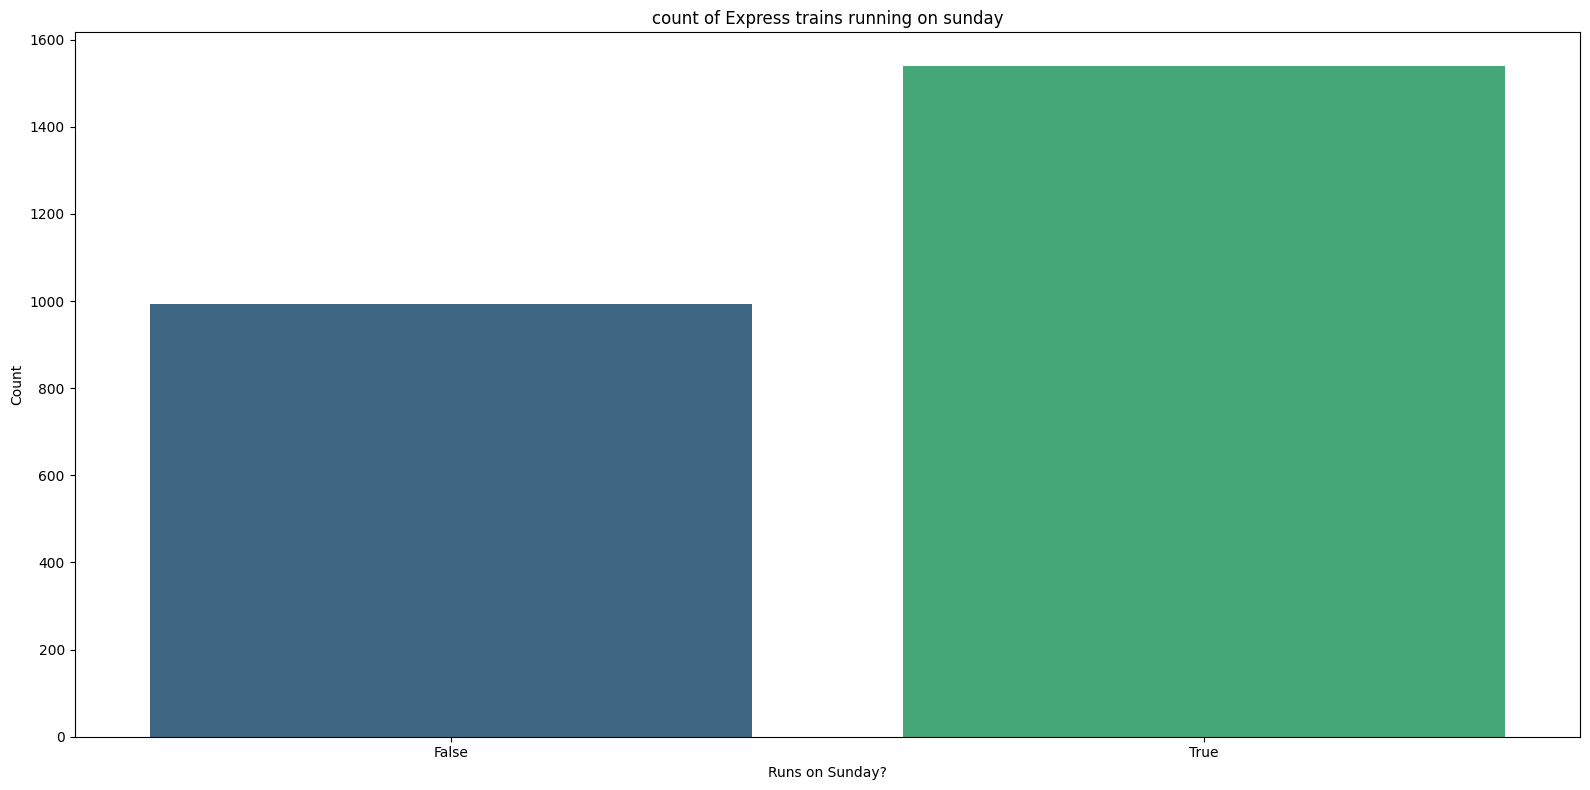

In [108]:



plt.figure(figsize=(16,8))
sns.countplot(x=trains['runs_ON_SUN'],data=trains, palette='viridis')
plt.title("count of Express trains running on sunday")
plt.xlabel("Runs on Sunday?")
plt.ylabel('Count')
plt.tight_layout()
plt.show()


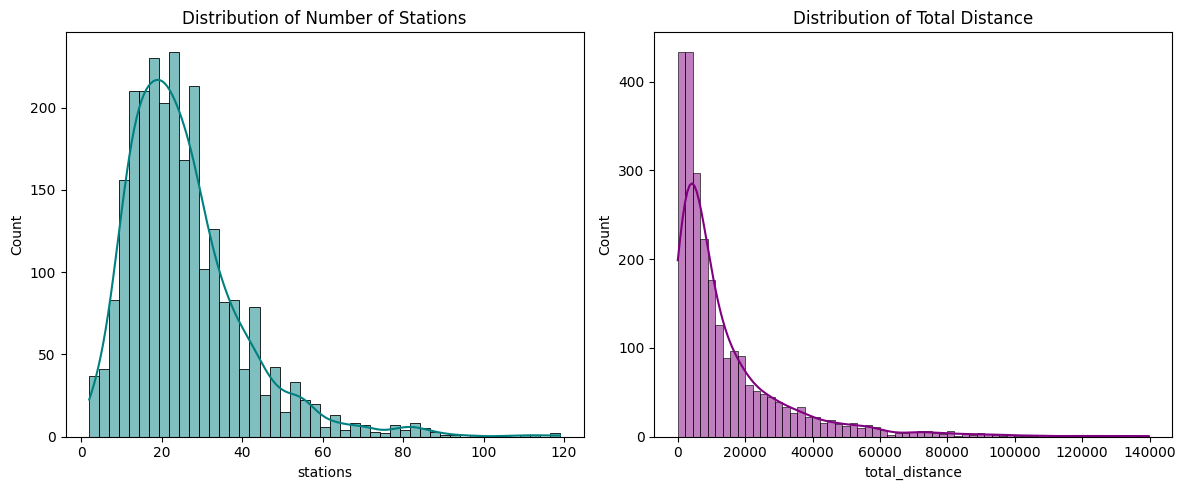

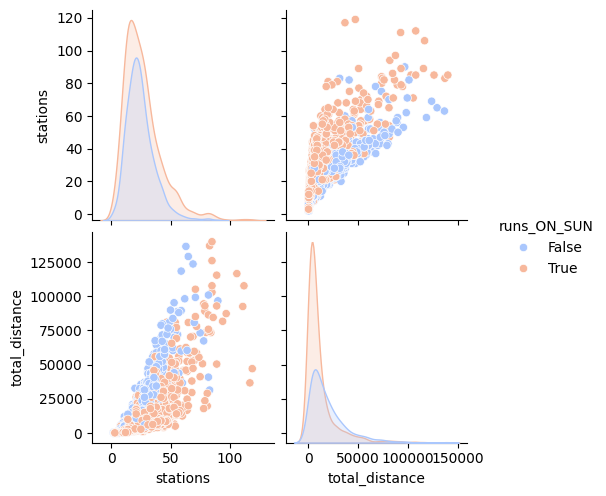

In [109]:
# Histograms for the numerical features
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(trains['stations'], ax=axes[0], kde=True, color='teal')
axes[0].set_title('Distribution of Number of Stations')

sns.histplot(trains['total_distance'], ax=axes[1], kde=True, color='purple')
axes[1].set_title('Distribution of Total Distance')

plt.tight_layout()
plt.show()

# Optional: Pairplot to see relationships if you want multiple visual angles
sns.pairplot(trains[['stations', 'total_distance', 'runs_ON_SUN']], hue='runs_ON_SUN', palette='coolwarm')
plt.show()